In [1]:
import os 
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Model

In [2]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
# #     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
local_weights_file = '/home/mazz/Desktop/github/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [5]:
pretrained_model_top_False = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, # Remove dense layer before CONV layers
                                weights = None) # Don'

In [6]:
pretrained_model_top_True = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = True, # Remove dense layer before CONV layers
                                weights = None) # Don'

In [7]:
pretrained_model_top_False.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [8]:
pretrained_model_top_True.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

batch_normalization_124 (BatchN (None, 7, 7, 192)    576         conv2d_124[0][0]                 
__________________________________________________________________________________________________
batch_normalization_127 (BatchN (None, 7, 7, 192)    576         conv2d_127[0][0]                 
__________________________________________________________________________________________________
batch_normalization_132 (BatchN (None, 7, 7, 192)    576         conv2d_132[0][0]                 
__________________________________________________________________________________________________
batch_normalization_133 (BatchN (None, 7, 7, 192)    576         conv2d_133[0][0]                 
__________________________________________________________________________________________________
activation_124 (Activation)     (None, 7, 7, 192)    0           batch_normalization_124[0][0]    
__________________________________________________________________________________________________
activation

In [9]:
for layer in pretrained_model_top_False.layers:
    print(layer.name)

input_1
conv2d
batch_normalization
activation
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_3
activation_3
conv2d_4
batch_normalization_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_8
activation_8
conv2d_6
conv2d_9
batch_normalization_6
batch_normalization_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_5
batch_normalization_7
batch_normalization_10
batch_normalization_11
activation_5
activation_7
activation_10
activation_11
mixed0
conv2d_15
batch_normalization_15
activation_15
conv2d_13
conv2d_16
batch_normalization_13
batch_normalization_16
activation_13
activation_16
average_pooling2d_1
conv2d_12
conv2d_14
conv2d_17
conv2d_18
batch_normalization_12
batch_normalization_14
batch_normalization_17
batch_normalization_18
activation_12
activation_14
activation_17
activation_18
mixed1
conv2d_22
batch_normalization_22
activation_22
conv2d

In [10]:
len(pretrained_model_top_False.layers)

311

In [11]:
len(pretrained_model_top_True.layers)

313

In [12]:
pretrained_model_top_False.load_weights(local_weights_file)

In [13]:
# Iterate through the layers and lock them, saying they are not going to be trainable with this code.
for layer in pretrained_model_top_False.layers:
    print(layer.name)
    layer.trainable = False

input_1
conv2d
batch_normalization
activation
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_3
activation_3
conv2d_4
batch_normalization_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_8
activation_8
conv2d_6
conv2d_9
batch_normalization_6
batch_normalization_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_5
batch_normalization_7
batch_normalization_10
batch_normalization_11
activation_5
activation_7
activation_10
activation_11
mixed0
conv2d_15
batch_normalization_15
activation_15
conv2d_13
conv2d_16
batch_normalization_13
batch_normalization_16
activation_13
activation_16
average_pooling2d_1
conv2d_12
conv2d_14
conv2d_17
conv2d_18
batch_normalization_12
batch_normalization_14
batch_normalization_17
batch_normalization_18
activation_12
activation_14
activation_17
activation_18
mixed1
conv2d_22
batch_normalization_22
activation_22
conv2d

In [14]:
# pre_trained_model.summary() # Very large!

# Choose which layer from the full inception network will be your last layer.
# Here we're choosing mixed7, which outputs a bunch of 7 x 7 convolutions.
last_layer = pretrained_model_top_False.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [18]:
from tensorflow.keras.optimizers import RMSprop

In [19]:
from tensorflow.keras.optimizers import RMSprop

In [22]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense  (1, activation='sigmoid')(x)           

In [23]:
model= Model(pretrained_model_top_False.input,x)

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [36]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=["accuracy"])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [27]:

base_dir = '/home/mazz/Desktop/github/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


In [29]:
train_data_gen =ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   rotation_range=40,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip=True)

In [30]:

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )


In [33]:
trainGenerator=train_data_gen.flow_from_directory(train_dir,batch_size=10,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [34]:
testGenerator=test_datagen.flow_from_directory(validation_dir,batch_size=10,class_mode='binary',target_size=(150,150))

Found 1000 images belonging to 2 classes.


In [37]:
history = model.fit(trainGenerator,validation_data=testGenerator,steps_per_epoch=100,epochs=10,validation_steps=5,verbose=2)

Epoch 1/10
100/100 - 76s - loss: 1.8389 - accuracy: 0.8070 - val_loss: 0.4865 - val_accuracy: 0.8800
Epoch 2/10
100/100 - 136s - loss: 0.7120 - accuracy: 0.8570 - val_loss: 0.1428 - val_accuracy: 0.9400
Epoch 3/10
100/100 - 152s - loss: 0.4172 - accuracy: 0.9020 - val_loss: 0.7844 - val_accuracy: 0.9000
Epoch 4/10
100/100 - 141s - loss: 0.4866 - accuracy: 0.9000 - val_loss: 0.4367 - val_accuracy: 0.9200
Epoch 5/10
100/100 - 123s - loss: 0.4486 - accuracy: 0.8970 - val_loss: 0.2420 - val_accuracy: 0.9600
Epoch 6/10
100/100 - 112s - loss: 0.4102 - accuracy: 0.9070 - val_loss: 0.0593 - val_accuracy: 0.9800
Epoch 7/10
100/100 - 121s - loss: 0.3186 - accuracy: 0.9400 - val_loss: 0.0444 - val_accuracy: 0.9800
Epoch 8/10
100/100 - 106s - loss: 0.3857 - accuracy: 0.9020 - val_loss: 0.7158 - val_accuracy: 0.9200
Epoch 9/10
100/100 - 93s - loss: 0.3193 - accuracy: 0.9160 - val_loss: 0.1486 - val_accuracy: 0.9600
Epoch 10/10
100/100 - 102s - loss: 0.3005 - accuracy: 0.9210 - val_loss: 0.4237 - va

In [38]:
import matplotlib.pyplot as plt

In [39]:
acc = historyy.history[accuracyracy"]
val_acc = histhistoryhistory["val_accuracy"]
loss = history.history["loss"]
val_loss = hhistory.history["val_loss"]

In [40]:

epochs = range(len(acc))


<Figure size 432x288 with 0 Axes>

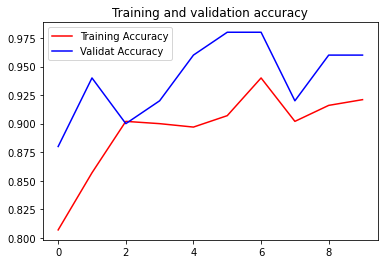

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validat Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

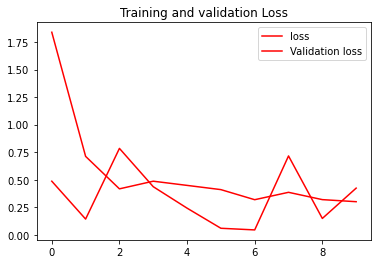

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(epochs,loss,'r',label='loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()